# Neural Time Series

Words, words, words.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Use NeuroDSP for time series simulations & analyses
from neurodsp import spectral, sim
from neurodsp.utils import create_times
from neurodsp.plts import plot_time_series, plot_power_spectra

In [2]:
# Simulation Settings
n_seconds = 2
s_rate = 1000

n_points = s_rate*n_seconds
times = create_times(n_points/s_rate, s_rate)

## Neural Signals

So, since power spectra might or might not be described and interpreted as containing
rhythmic components, the question becomes what is the best / most likely description for
neural signals.

Neural signals clearly contain 1/f activity, as seen in their frequency representations.

They also sometimes do contain clear rhythmic components, visible as clear and relatively
consistent rhythms in the time series, and regions of extra power, or peaks, in the power
spectra, over and above 1/f.

Here we will try and infer what is the most likely description for neural activity,
across frequencies other than where we see clear peaks. To do so, we will explore a
simple model of local field potential data generation, which shows that 1/f activity
can arise from aggregated activity across post-synaptic potentials.

### Synaptic Kernels

Words, words, words.


In [3]:
kernel = sim.sim_synaptic_kernel(0.2, s_rate, 0.01, 0.01)

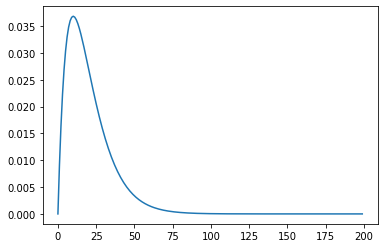

In [4]:
plt.plot(kernel)

### Local Field Potentials

Simulate a local field potential as aggregate activity of post-synaptic potentials.

In [5]:
synap_sig = sim.sim_synaptic_current(n_seconds, s_rate)

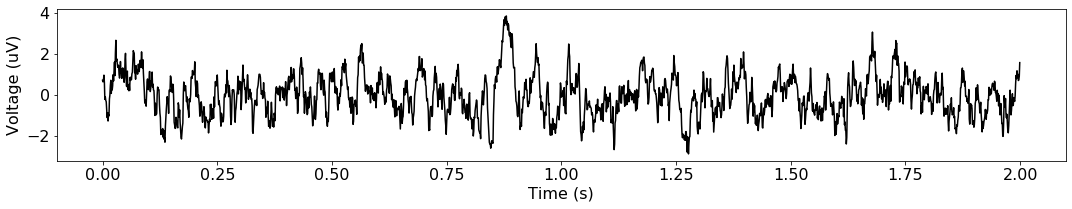

In [6]:
plot_time_series(times, synap_sig)

In [7]:
freqs, powers = spectral.compute_spectrum(synap_sig, s_rate)

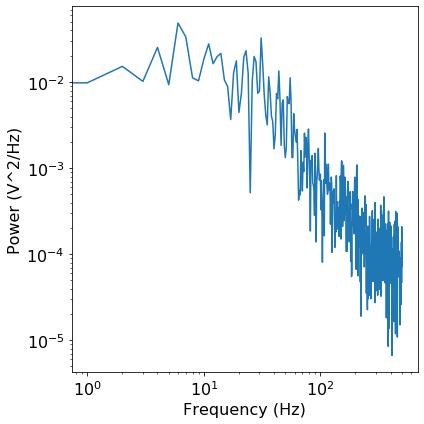

In [8]:
plot_power_spectra(freqs, powers)

### Conclusion

A simple LFP model creates 1/f distributed data based on simulating aggregated
activity from PSPs. Under this model, the power spectra is 1/f distributed, with
no characteristic frequencies, and the time series exhibits aperiodic activity.
Under this model the power at any particular frequency is not considered to
relate to rhythmic activity.